In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

In [60]:
orig_users = 55000
orig_converted = 5000

variation_users = 54000
variation_converted = 5050

In [61]:
print(f'Probability of exact orig is {beta.ppf(0.5, orig_converted, orig_users - orig_converted)}')
print(f'Probability of exact orig is {beta.ppf(0.5, variation_converted, variation_users - variation_converted)}')

Probability of exact orig is 0.0909041322387544
Probability of exact orig is 0.09351350023448618


In [62]:
orig_x = np.linspace(beta.ppf(0.01, orig_converted, orig_users - orig_converted), 
                         beta.ppf(0.99, orig_converted, orig_users - orig_converted),
                        100)
variation_x = np.linspace(beta.ppf(0.01, variation_converted, variation_users - variation_converted), 
                         beta.ppf(0.99, variation_converted, variation_users - variation_converted),
                        100)

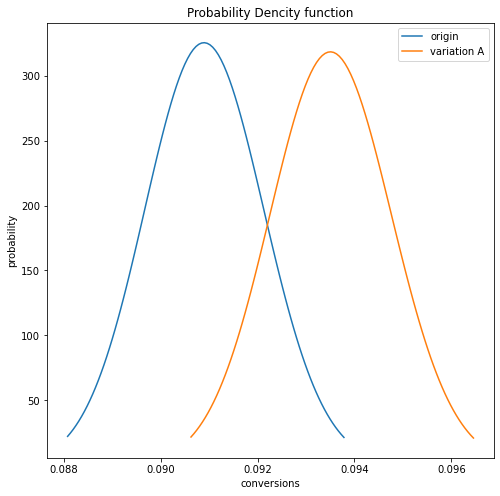

In [58]:
plt.figure(figsize=(8,8))
plt.plot(orig_x, beta.pdf(orig_x, orig_converted, orig_users - orig_converted), label='origin')
plt.plot(variation_x, beta.pdf(variation_x, variation_converted, variation_users - variation_converted), label='variation A')
plt.legend()

plt.xlabel('conversions')
plt.ylabel('probability')
plt.title('Probability Dencity function')
plt.show()

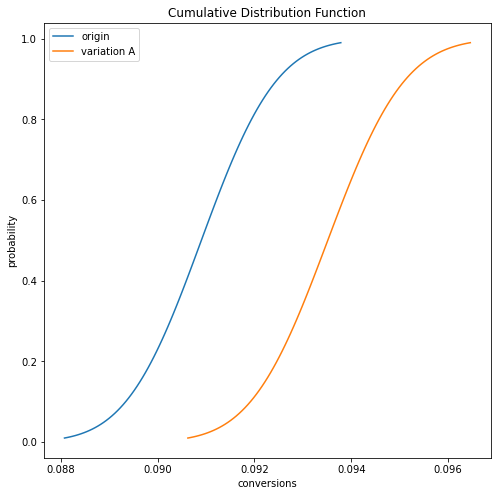

In [63]:
plt.figure(figsize=(8,8))
plt.plot(orig_x, beta.cdf(orig_x, orig_converted, orig_users - orig_converted), label='origin')
plt.plot(variation_x, beta.cdf(variation_x, variation_converted, variation_users - variation_converted), label='variation A')
plt.legend()
plt.xlabel('conversions')
plt.ylabel('probability')
plt.title('Cumulative Distribution Function')
plt.show()

In [64]:
#Probability to be best
# Monte Carlo integration (importance Sampling)
trials = 10000
orig_samples = np.random.beta(orig_converted, orig_users - orig_converted, trials)
variant_samples = np.random.beta(variation_converted, variation_users - variation_converted, trials)
b_better_trials = np.sum(variant_samples >= orig_samples)
p = b_better_trials / trials
print('Probability to be better %s%%' % int(p*100))

Probability to be better 93%


In [31]:
#REFERENCES
#https://medium.com/vptech/introduction-to-bayesian-a-b-testing-in-python-df81a9b3f5fd